final results of different models on different finetune tasks

paint finetuned test results

Number of predicted values for the true top 10: 9


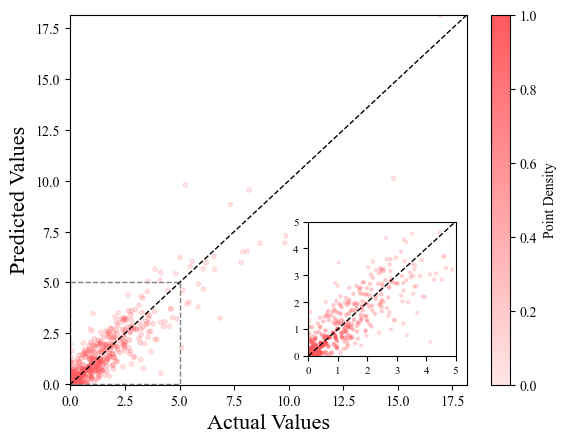

In [17]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_diff.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.15, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[0])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y <= 5) & (x <= 5)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=5, cmap=cmap)
ax_inset.plot([0, 5], [0, 5], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(0, 5)
ax_inset.set_ylim(0, 5)
ax_inset.set_xticks([0, 1, 2, 3, 4, 5])
ax_inset.set_yticks([0, 1, 2, 3, 4, 5])
ax_inset.tick_params(axis='both', which='major', labelsize=8) 

# Rectangle to indicate zoomed area
rect = plt.Rectangle((0, 0), 5, 5, linewidth=1,linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Add two regions
# Region for true values
true_top_10 = np.sort(y)[-10:]
true_region_min = true_top_10.min()

# Region for predicted values
pred_top_10 = np.sort(x)[-10:]
pred_region_min = pred_top_10.min()
# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y >= true_region_min) & (x >= pred_region_min))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")
plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()


Number of predicted values for the true top 10: 10


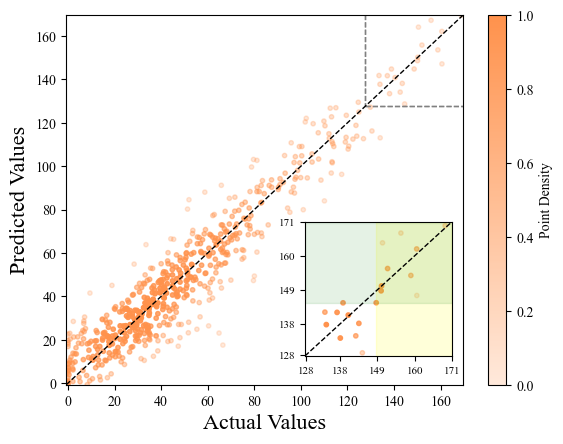

In [4]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_CH4_capa.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[1])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")


# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[-15:]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=10, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Add two regions
# Region for true values
true_top_10 = np.sort(y)[-10:]
true_region_min = true_top_10.min()
ax_inset.axvspan(true_region_min, inset_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[-10:]
pred_region_min = pred_top_10.min()
ax_inset.axhspan(pred_region_min, inset_max, color='green', alpha=0.1)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y >= true_region_min) & (x >= pred_region_min))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()

Number of predicted values for the true top 10: 6


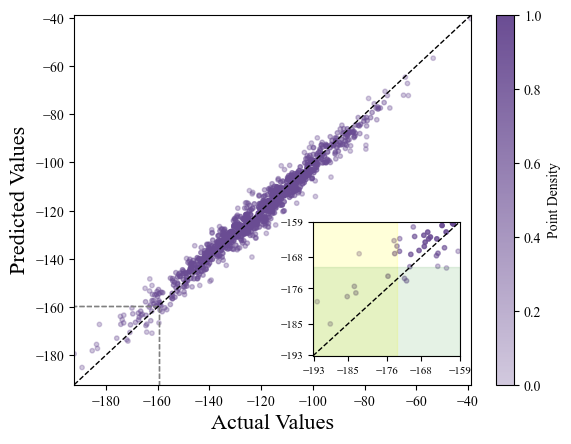

In [14]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\MCRT\compared_models\GNN_predictions_and_labels_ALIGNN_T2_best_model.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.3, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[5])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['True Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")


# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[:20]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=10, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()

Number of predicted values for the true top 10: 8


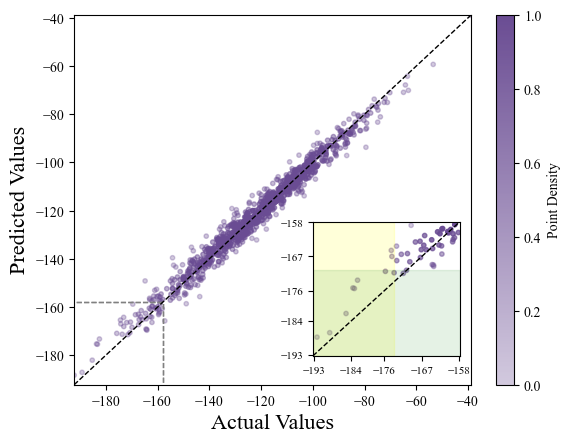

In [16]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_bigali.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.3, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[5])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")


# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[:20]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=10, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()

below is T2 test cold-start experiments

Mean Absolute Error (MAE): 3.041781389688743
R-squared (R²): 0.9702342586822851
Number of predicted values for the true top 10: 8


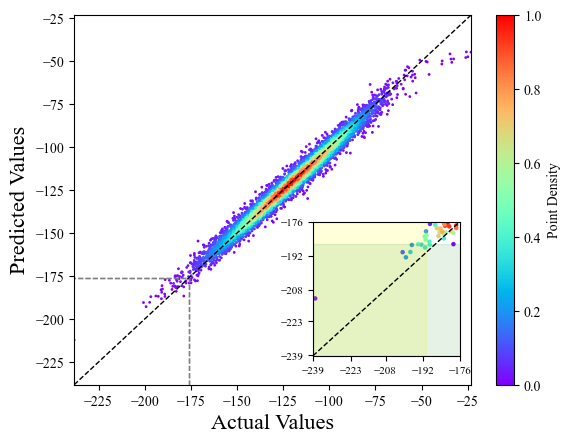

In [118]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_absolute_error, r2_score

# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_test_1000.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap

# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]

cmap = "rainbow"

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Calculate MAE and R²
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MAE and R²
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=1, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values', fontsize=16)
ax.set_ylabel('Predicted Values', fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

sorted_indices = np.argsort(y)[:20]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1

# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=5, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()


Mean Absolute Error (MAE): 6.39605858041958
R-squared (R²): 0.8688737338144196
Number of predicted values for the true top 10: 5


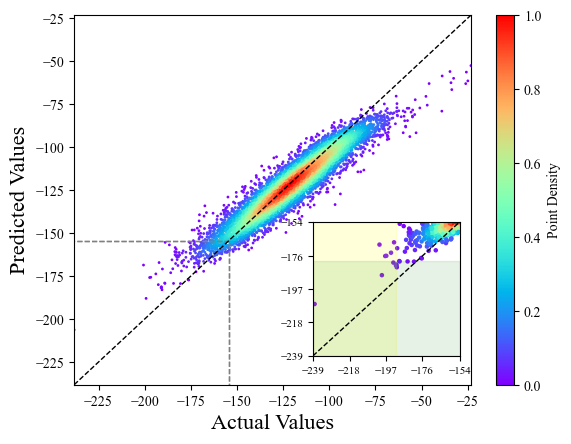

In [12]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_absolute_error, r2_score

# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\MCRT\compared_models\GNN_predictions_and_labels_4+256_T2_test_1000.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap

# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]

cmap = "rainbow"

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['True Labels'].values

# Calculate MAE and R²
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MAE and R²
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=1, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values', fontsize=16)
ax.set_ylabel('Predicted Values', fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

sorted_indices = np.argsort(y)[:20]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1

# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=5, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()


Number of predicted values for the true top 10: 6


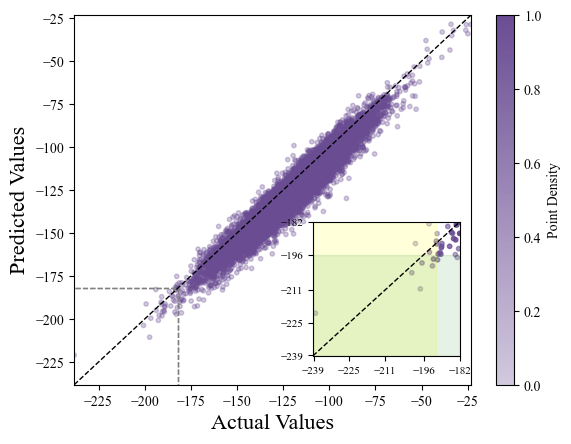

In [230]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_ONLY.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.3, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[5])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")


# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[:20]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=10, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()

Number of predicted values for the true top 10: 9


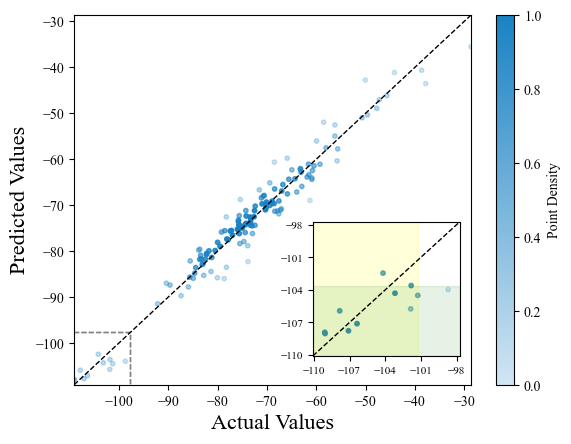

In [199]:


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2A_lattice_energy.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[4])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

# # Calculate the range for the inset plot
# min_y = min(y)
# max_y = max(y)
# inset_min = min_y + (max_y - min_y) * 0.8
# inset_max = max_y


# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[:11]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=10, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()


Number of predicted values for the true top 10: 10


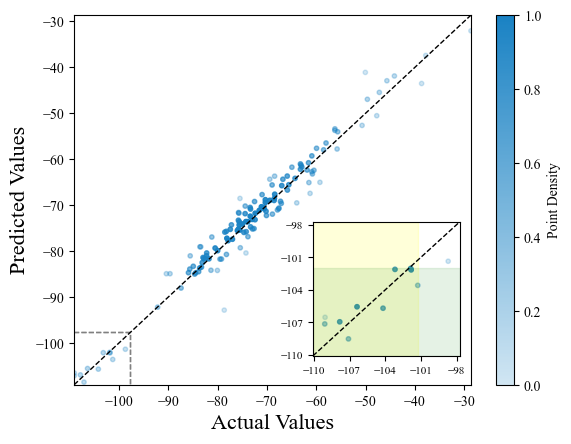

In [5]:


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2A_bigali.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[4])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

# # Calculate the range for the inset plot
# min_y = min(y)
# max_y = max(y)
# inset_min = min_y + (max_y - min_y) * 0.8
# inset_max = max_y


# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[:11]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=10, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()


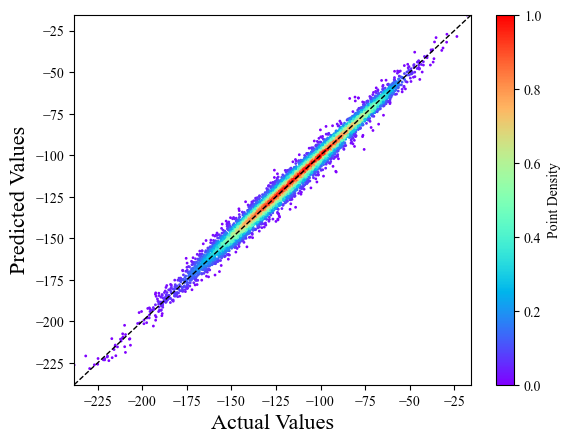

In [66]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_Tall.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
# cmap= create_cmap(base_colors[3])
cmap="rainbow"

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=1, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

# # Inset plot
# ax_inset = fig.add_axes([0.17, 0.55, 0.25, 0.3])  # [left, bottom, width, height]
# mask = (y <= 40) & (x <= 40)
# ax_inset.scatter(y[mask], x[mask], c=z[mask], s=2, cmap=cmap)
# ax_inset.plot([0, 40], [0, 40], linestyle="--", linewidth=1, color="black")
# ax_inset.set_xlim(0, 40)
# ax_inset.set_ylim(0, 40)
# ax_inset.set_xticks([0, 10, 20, 30, 40])
# ax_inset.set_yticks([0, 10, 20, 30, 40])

# # Rectangle to indicate zoomed area
# rect = plt.Rectangle((0, 0), 5, 5, linewidth=1,linestyle="--", edgecolor='grey', facecolor='none')
# ax.add_patch(rect)

plt.savefig(plot_path, format="png")
plt.show()

Number of predicted values for the true top 30: 29


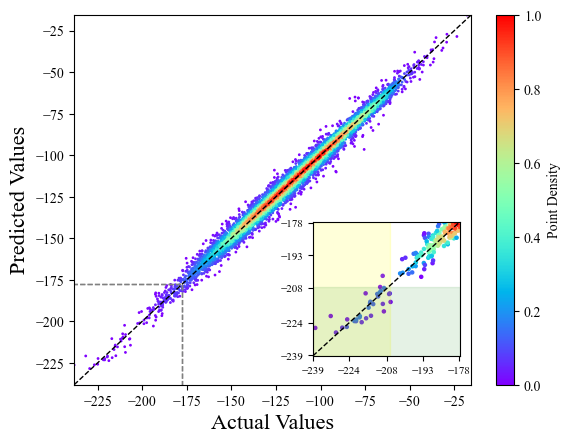

In [201]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_Tall.csv"
df = pd.read_csv(csv_path)

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap

# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#8AC926',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]

cmap = "rainbow"

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=1, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values', fontsize=16)
ax.set_ylabel('Predicted Values', fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

# # Calculate the range for the inset plot
# sorted_y = np.sort(y)
# inset_min = sorted_y[:100].min()
# inset_max = sorted_y[:100].max()


# # Inset plot
# ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
# mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
# ax_inset.scatter(y[mask], x[mask], c=z[mask], s=5, cmap=cmap)
# ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
# ax_inset.set_xlim(inset_min, inset_max)
# ax_inset.set_ylim(inset_min, inset_max)
# # Set ticks to be integers
# xticks = np.linspace(inset_min, inset_max, 5)
# yticks = np.linspace(inset_min, inset_max, 5)
# ax_inset.set_xticks(np.round(xticks).astype(int))
# ax_inset.set_yticks(np.round(yticks).astype(int))
# ax_inset.tick_params(axis='both', which='major', labelsize=9)
# # Rectangle to indicate zoomed area
# rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
# ax.add_patch(rect)

# plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
# plt.show()
# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[:100]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=5, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)
# Add two regions
# Region for true values
true_top_10 = np.sort(y)[:30]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[:30]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 30: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()


Mean Absolute Error (MAE): 1.566484707807894
R² Score: 0.9868828281959605
Number of predicted values for the true top 10: 10


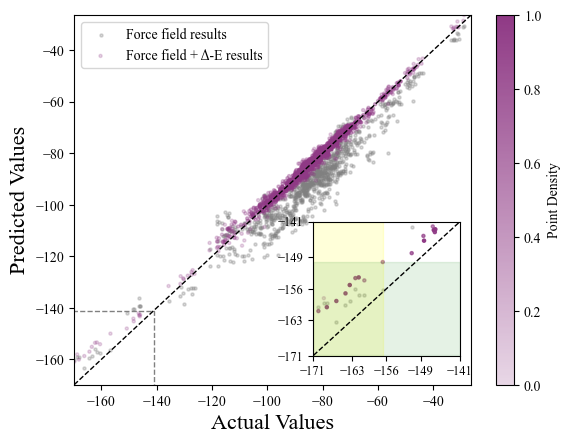

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
predictions_df = pd.read_csv(r'D:\Projects\MyProjects\MCRT\test_predictions_and_labels_1000CSP.csv')
structure_df = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\1000CSP\1000CSP_4.csv')

# Merge data on CIF_ID and structure columns
merged_df = pd.merge(predictions_df, structure_df, left_on='CIF_ID', right_on='structure', how='left')
merged_df['True_Predictions'] = merged_df['Predictions'] + merged_df['FIT_DMA_inter_energy_kjmol']
merged_df['True_Labels'] = merged_df['B86bPBE_XDM_inter_energy_kjmol']
merged_df['MD_energy'] = merged_df['FIT_DMA_inter_energy_kjmol']

# Extract relevant columns for analysis
final_df = merged_df[['CIF_ID', 'True_Predictions', 'True_Labels']]

# Calculate MAE and R²
mae = mean_absolute_error(final_df['True_Labels'], final_df['True_Predictions'])
r2 = r2_score(final_df['True_Labels'], final_df['True_Predictions'])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Define custom color map
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    return LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Set color for the plot
base_colors = ['#8F3985']  # Blue
cmap = create_cmap(base_colors[0])

# Plotting
y = final_df['True_Labels'].values
x = final_df['True_Predictions'].values
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())  # Normalize density

fig, ax = plt.subplots()

# Background scatter plot for unoptimized results (in gray)
ax.scatter(merged_df['True_Labels'],merged_df['MD_energy'] , color='gray', alpha=0.3, s=5, label='Force field results')

# Main scatter plot for optimized results
scatter = ax.scatter(y, x, c=z, s=5, cmap=cmap, label='Force field + Δ-E results')
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values', fontsize=16)
ax.set_ylabel('Predicted Values', fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")

sorted_indices = np.argsort(y)[:15]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min()) - 1
inset_max = max(inset_y.max(), inset_x.max()) + 1

# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
bg_mask = (merged_df['MD_energy'] >= inset_min) & (merged_df['MD_energy'] <= inset_max) & (merged_df['True_Labels'] >= inset_min) & (merged_df['True_Labels'] <= inset_max)

# Background (unoptimized) points in inset
ax_inset.scatter(merged_df['True_Labels'][bg_mask], merged_df['MD_energy'][bg_mask], color='gray', alpha=0.3, s=5)

# Main inset scatter plot for optimized results
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=5, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)

# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)

# Rectangle to indicate zoomed area
rect = plt.Rectangle((inset_min, inset_min), inset_max - inset_min, inset_max - inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Add regions for true values and predicted values
true_top_10 = np.sort(y)[:10]
true_region_max = true_top_10.max()
ax_inset.axvspan(inset_min, true_region_max, color='yellow', alpha=0.15)

pred_top_10 = np.sort(x)[:10]
pred_region_max = pred_top_10.max()
ax_inset.axhspan(inset_min, pred_region_max, color='green', alpha=0.10)

# Count predicted values for true top 10
num_predicted_in_true_top_10 = np.sum((y <= true_region_max) & (x <= pred_region_max))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

# Show legend and save plot
ax.legend()
plt.savefig(r"1000CSP_final_plot_with_background_and_inset4.png", dpi=300, bbox_inches='tight')
plt.show()


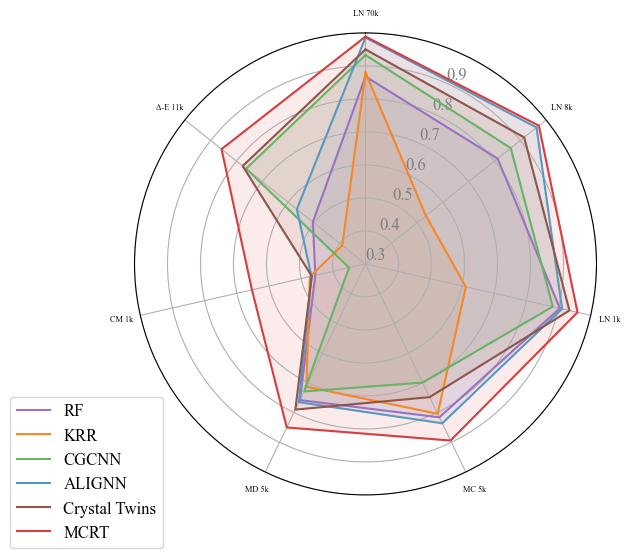

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the user's table
data = {
    "Task": [
        "LN 70k",
        "LN 8k",
        "LN 1k",
        "MC 5k",
        "MD 5k",
        "CM 1k",
        "Δ-E 11k",
    ],
    "RF": [0.868, 0.812, 0.904, 0.816, 0.758,0.456,0.504],
    "KRR": [0.88, 0.534, 0.612, 0.804, 0.713,0.473,0.390],
    "CGCNN": [0.933, 0.863, 0.882, 0.699, 0.729,0.351,0.763],
    "ALIGNN": [0.986, 0.963, 0.911, 0.836, 0.765,0.468,0.566],
    "Crystal Twins": [0.95, 0.915, 0.934, 0.748, 0.79,0.467,0.776],
    "MCRT": [0.989, 0.972, 0.959, 0.894, 0.85,0.653,0.858]
}

df = pd.DataFrame(data)

# Radar chart
categories = df['Task']
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(polar=True))

# Adjust starting angle to make one axis vertical
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=6)

# Draw ylabels
ax.set_rlabel_position(24)
plt.yticks([0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ["0.3","0.4","0.5", "0.6", "0.7", "0.8", "0.9", ""], color="grey", size=12)
plt.ylim(0.3, 1)

# Indices for each model in the dataframe
indices = df.columns[1:]

colors = {
    "RF": "#9B71C1",
    "KRR": "#F88724",
    "CGCNN": "#64B665",
    "ALIGNN": "#5898C1",  
    "Crystal Twins": "C71585",
    "MCRT": "#D83D3F"  
}

# Plot each model
for model in df.columns[1:]:
    values = df[model].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=model, color=colors[model])
    ax.fill(angles, values, color=colors[model], alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.08, 0.23), prop={'size': 12})
plt.savefig(r'D:\Projects\MyProjects\MCRT\MCRT\data_processor\results_visual\radar_half.png',  dpi=300, bbox_inches='tight')
plt.show()


In [43]:
import pandas as pd
import plotly.express as px

df_density = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\SH1\SH1_density.csv', header=None)
df_energy = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\SH1\SH1_energy.csv', header=None)

df = pd.merge(df_density, df_energy, on=0)
df.columns = ['Material', 'Density', 'Energy']

max_energy = -80  
df_filtered = df[df['Energy'] <= max_energy]


fig = px.scatter(df_filtered, x='Density', y='Energy', hover_data=['Material'],
                 labels={'Density': 'Density', 'Energy': 'Energy'},
                 title='Density vs Energy Scatter Plot')

fig.update_layout(
    xaxis=dict(side='top'),
    yaxis=dict(tickformat='.2f'),
    clickmode='event+select'
)

fig.show()


In [49]:
import pandas as pd
import plotly.express as px
import json


df_density = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_density.csv', header=None)
df_energy = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_lattice_energy.csv', header=None)

df = pd.merge(df_density, df_energy, on=0)
df.columns = ['Material', 'Density', 'Energy']

with open(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\dataset_split_500.json', 'r') as f:
    split_data = json.load(f)

df_pred = pd.read_csv(r'D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_test_500.csv')
df_pred.columns = ['Material', 'Predictions', 'Labels']  

train_materials = set(split_data['train'])
val_materials = set(split_data['val'])
test_materials = set(split_data['test'])


df_train_val = df[df['Material'].isin(train_materials.union(val_materials))]
df_train_val['Set'] = 'Train/Val'

df_test = pd.merge(df_pred[['Material', 'Predictions']], df[['Material', 'Density']], on='Material', how='left')
df_test.columns = ['Material', 'Energy', 'Density']
df_test['Set'] = 'Test'

df_combined = pd.concat([df_train_val[['Material', 'Density', 'Energy', 'Set']], df_test], ignore_index=True)

df_filtered = df_combined[df_combined['Energy'] < -120]

fig = px.scatter(df_filtered, x='Density', y='Energy', color='Set', hover_data=['Material'],
                 labels={'Density': 'Density', 'Energy': 'Energy'},
                 title='Density vs Energy Scatter Plot (Energy < -120)')

fig.update_layout(
    xaxis=dict(side='top'),
    yaxis=dict(tickformat='.2f'),
    clickmode='event+select'
)

fig.show()


C:\Users\MinggaoFeng\AppData\Local\Temp\ipykernel_41192\2289039843.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\MinggaoFeng\AppData\Local\Temp\ipykernel_53608\1734570974.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



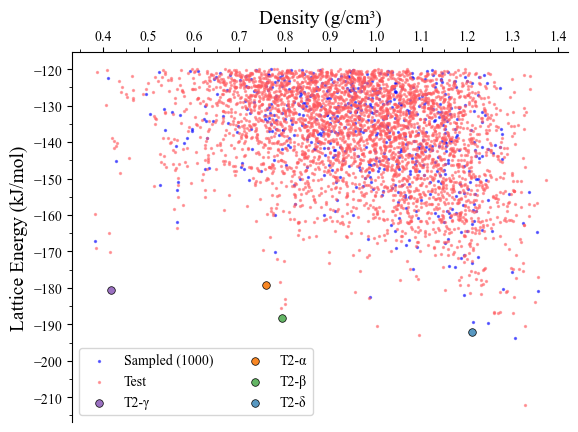

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from matplotlib.ticker import MultipleLocator
plt.rcParams["font.family"] = "Times New Roman"

# Read CSV files
df_density = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_density.csv', header=None)
df_energy = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_lattice_energy.csv', header=None)

# Merge data
df = pd.merge(df_density, df_energy, on=0)
df.columns = ['Material', 'Density', 'Energy']

# Read split.json file
with open(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\dataset_split_1000.json', 'r') as f:
    split_data = json.load(f)

# Read prediction.csv file
csv_path = r'D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_test_1000.csv'
df_pred = pd.read_csv(csv_path)
df_pred.columns = ['Material', 'Predictions', 'Labels']  # Rename columns

# Get different datasets from split.json
train_materials = set(split_data['train'])
val_materials = set(split_data['val'])
test_materials = set(split_data['test'])

# Create a new DataFrame for train and val data
df_train_val = df[df['Material'].isin(train_materials.union(val_materials))]
df_train_val['Set'] = 'Sampled'

# Create a new DataFrame for test data
df_test = pd.merge(df_pred[['Material', 'Predictions']], df[['Material', 'Density']], on='Material', how='left')
df_test.columns = ['Material', 'Energy', 'Density']
df_test['Set'] = 'Test'

# Combine two DataFrames
df_combined = pd.concat([df_train_val[['Material', 'Density', 'Energy', 'Set']], df_test], ignore_index=True)

# Calculate the total number of sampled data before filtering
total_sampled_count = len(df_train_val)

# Filter structures with energy values less than -120
df_filtered = df_combined[df_combined['Energy'] < -120]

# List of specific materials to highlight with different colors and names
highlight_materials = {
    'T2_00013': ('#9B71C1', 'T2-γ'), 
    'T2_00024': ('#F88724', 'T2-α'), 
    'T2_00011': ('#64B665', 'T2-β'),
    'T2_00009': ('#5898C1', 'T2-δ')  
}

# Create static scatter plot
fig, ax = plt.subplots()

# Plot scatter plot for train/val data
train_val_data = df_filtered[df_filtered['Set'] == 'Sampled']
ax.scatter(train_val_data['Density'], train_val_data['Energy'], color='blue', label=f'Sampled ({total_sampled_count})', alpha=0.5, s=2)

# Plot scatter plot for test data
test_data = df_filtered[df_filtered['Set'] == 'Test']
ax.scatter(test_data['Density'], test_data['Energy'], color='#FF595E', label='Test', alpha=0.5, s=2)

# Highlight specific materials with different colors and names
for material, (color, name) in highlight_materials.items():
    highlight_data = df_filtered[df_filtered['Material'] == material]
    ax.scatter(highlight_data['Density'], highlight_data['Energy'], color=color, label=name, s=30, edgecolors='black', linewidth=0.5)

# Move X-axis to top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Remove right and bottom spines
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# Add legend and labels with larger font size
ax.set_xlabel('Density (g/cm³)', fontsize=14)
ax.set_ylabel('Lattice Energy (kJ/mol)', fontsize=14)
ax.legend(ncol=2)  # Adjust legend position and columns

# Save and display the plot
plot_path = os.path.splitext(csv_path)[0] + '_ESF.png'
plt.savefig(plot_path, dpi=300, format="png")
plt.show()


C:\Users\MinggaoFeng\AppData\Local\Temp\ipykernel_31368\3079100443.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_val['Set'] = 'Sampled'


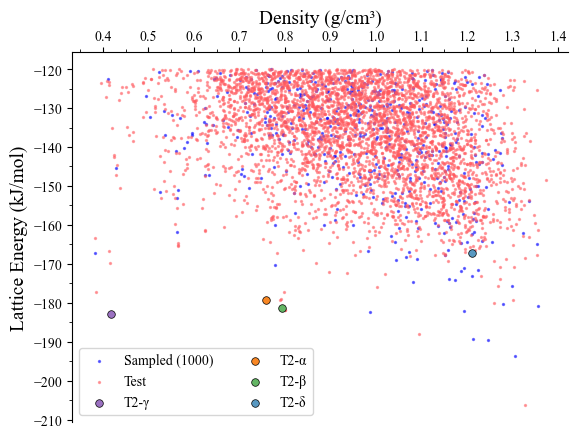

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from matplotlib.ticker import MultipleLocator
plt.rcParams["font.family"] = "Times New Roman"

# Read CSV files
df_density = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_density.csv', header=None)
df_energy = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_lattice_energy.csv', header=None)

# Merge data
df = pd.merge(df_density, df_energy, on=0)
df.columns = ['Material', 'Density', 'Energy']

# Read split.json file
with open(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\dataset_split_1000.json', 'r') as f:
    split_data = json.load(f)

# Read prediction.csv file
csv_path = r'D:\Projects\MyProjects\MCRT\MCRT\compared_models\GNN_predictions_and_labels_4+256_T2_test_1000.csv'
df_pred = pd.read_csv(csv_path)
df_pred.columns = ['Material', 'Predictions', 'Labels']  # Rename columns

# Get different datasets from split.json
train_materials = set(split_data['train'])
val_materials = set(split_data['val'])
test_materials = set(split_data['test'])

# Create a new DataFrame for train and val data
df_train_val = df[df['Material'].isin(train_materials.union(val_materials))]
df_train_val['Set'] = 'Sampled'

# Create a new DataFrame for test data
df_test = pd.merge(df_pred[['Material', 'Predictions']], df[['Material', 'Density']], on='Material', how='left')
df_test.columns = ['Material', 'Energy', 'Density']
df_test['Set'] = 'Test'

# Combine two DataFrames
df_combined = pd.concat([df_train_val[['Material', 'Density', 'Energy', 'Set']], df_test], ignore_index=True)

# Calculate the total number of sampled data before filtering
total_sampled_count = len(df_train_val)

# Filter structures with energy values less than -120
df_filtered = df_combined[df_combined['Energy'] < -120]

# List of specific materials to highlight with different colors and names
highlight_materials = {
    'T2_00013': ('#9B71C1', 'T2-γ'), 
    'T2_00024': ('#F88724', 'T2-α'), 
    'T2_00011': ('#64B665', 'T2-β'),
    'T2_00009': ('#5898C1', 'T2-δ')  
}

# Create static scatter plot
fig, ax = plt.subplots()

# Plot scatter plot for train/val data
train_val_data = df_filtered[df_filtered['Set'] == 'Sampled']
ax.scatter(train_val_data['Density'], train_val_data['Energy'], color='blue', label=f'Sampled ({total_sampled_count})', alpha=0.5, s=2)

# Plot scatter plot for test data
test_data = df_filtered[df_filtered['Set'] == 'Test']
ax.scatter(test_data['Density'], test_data['Energy'], color='#FF595E', label='Test', alpha=0.5, s=2)

# Highlight specific materials with different colors and names
for material, (color, name) in highlight_materials.items():
    highlight_data = df_filtered[df_filtered['Material'] == material]
    ax.scatter(highlight_data['Density'], highlight_data['Energy'], color=color, label=name, s=30, edgecolors='black', linewidth=0.5)

# Move X-axis to top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Remove right and bottom spines
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# Add legend and labels with larger font size
ax.set_xlabel('Density (g/cm³)', fontsize=14)
ax.set_ylabel('Lattice Energy (kJ/mol)', fontsize=14)
ax.legend(ncol=2)  # Adjust legend position and columns

# Save and display the plot
plot_path = os.path.splitext(csv_path)[0] + '_ESF.png'
plt.savefig(plot_path, dpi=300, format="png")
plt.show()


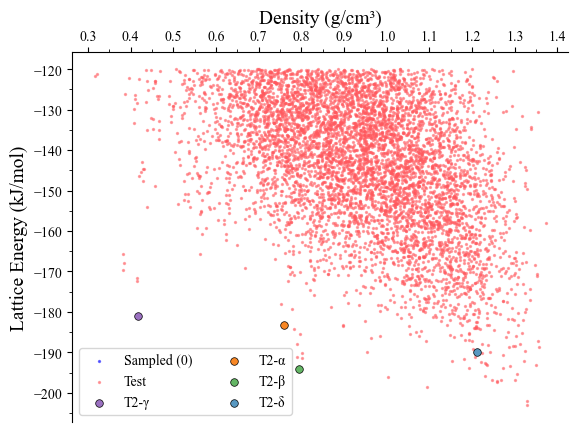

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from matplotlib.ticker import MultipleLocator

# 设置字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Read density and energy CSV files
df_density = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_density.csv', header=None)
df_energy = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_lattice_energy.csv', header=None)

# Merge data
df = pd.merge(df_density, df_energy, on=0)
df.columns = ['Material', 'Density', 'Energy']

# Read prediction CSV file for the test dataset
csv_path = r'D:\Projects\MyProjects\MCRT\test_predictions_and_labels_T2_test_0.csv'
df_pred = pd.read_csv(csv_path)
df_pred.columns = ['Material', 'Predictions', 'Labels']  # Rename columns

# Merge prediction data with density and energy data
df_test = pd.merge(df_pred[['Material', 'Predictions']], df[['Material', 'Density', 'Energy']], on='Material', how='left')
df_test['Set'] = 'Test'

# Filter structures with energy values less than -120
df_filtered = df_test[df_test['Predictions'] < -120]

# List of specific materials to highlight with different colors and names
highlight_materials = {
    'T2_00013': ('#9B71C1', 'T2-γ'), 
    'T2_00024': ('#F88724', 'T2-α'), 
    'T2_00011': ('#64B665', 'T2-β'),
    'T2_00009': ('#5898C1', 'T2-δ')  
}

# Create static scatter plot
fig, ax = plt.subplots()

# Add Sampled (0) label manually
ax.scatter([], [], color='blue', label='Sampled (0)', alpha=0.5, s=2)

# Plot scatter plot for test data
ax.scatter(df_filtered['Density'], df_filtered['Predictions'], color='#FF595E', label='Test', alpha=0.5, s=2)

# Highlight specific materials with different colors and names
for material, (color, name) in highlight_materials.items():
    highlight_data = df_filtered[df_filtered['Material'] == material]
    ax.scatter(highlight_data['Density'], highlight_data['Predictions'], color=color, label=name, s=30, edgecolors='black', linewidth=0.5)

# Move X-axis to top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Remove right and bottom spines
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# Add legend and labels with larger font size
ax.set_xlabel('Density (g/cm³)', fontsize=14)
ax.set_ylabel('Lattice Energy (kJ/mol)', fontsize=14)
ax.legend(ncol=2)  # Adjust legend position and columns

# Save and display the plot
plot_path = os.path.splitext(csv_path)[0] + '_ESF.png'
plt.savefig(plot_path, dpi=300, format="png")
plt.show()


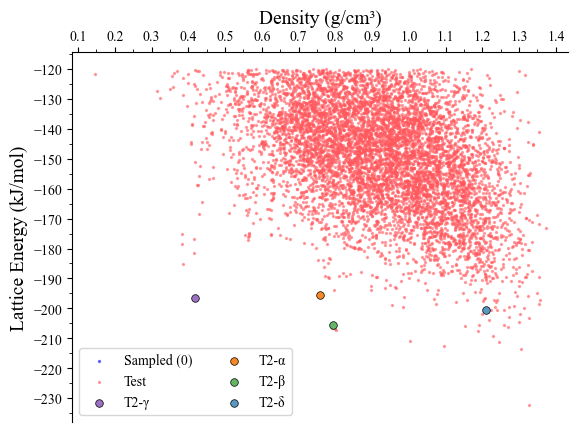

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from matplotlib.ticker import MultipleLocator

# 设置字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Read density and energy CSV files
df_density = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_density.csv', header=None)
df_energy = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_lattice_energy.csv', header=None)

# Merge data
df = pd.merge(df_density, df_energy, on=0)
df.columns = ['Material', 'Density', 'Energy']

# Read prediction CSV file for the test dataset
csv_path = r'D:\Projects\MyProjects\MCRT\MCRT\compared_models\GNN_predictions_and_labels_4+256_T2_test_0.csv'
df_pred = pd.read_csv(csv_path)
df_pred.columns = ['Material', 'Predictions', 'Labels']  # Rename columns

# Merge prediction data with density and energy data
df_test = pd.merge(df_pred[['Material', 'Predictions']], df[['Material', 'Density', 'Energy']], on='Material', how='left')
df_test['Set'] = 'Test'

# Filter structures with energy values less than -120
df_filtered = df_test[df_test['Predictions'] < -120]

# List of specific materials to highlight with different colors and names
highlight_materials = {
    'T2_00013': ('#9B71C1', 'T2-γ'), 
    'T2_00024': ('#F88724', 'T2-α'), 
    'T2_00011': ('#64B665', 'T2-β'),
    'T2_00009': ('#5898C1', 'T2-δ')  
}

# Create static scatter plot
fig, ax = plt.subplots()

# Add Sampled (0) label manually
ax.scatter([], [], color='blue', label='Sampled (0)', alpha=0.5, s=2)

# Plot scatter plot for test data
ax.scatter(df_filtered['Density'], df_filtered['Predictions'], color='#FF595E', label='Test', alpha=0.5, s=2)

# Highlight specific materials with different colors and names
for material, (color, name) in highlight_materials.items():
    highlight_data = df_filtered[df_filtered['Material'] == material]
    ax.scatter(highlight_data['Density'], highlight_data['Predictions'], color=color, label=name, s=30, edgecolors='black', linewidth=0.5)

# Move X-axis to top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Remove right and bottom spines
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# Add legend and labels with larger font size
ax.set_xlabel('Density (g/cm³)', fontsize=14)
ax.set_ylabel('Lattice Energy (kJ/mol)', fontsize=14)
ax.legend(ncol=2)  # Adjust legend position and columns

# Save and display the plot
plot_path = os.path.splitext(csv_path)[0] + '_ESF.png'
plt.savefig(plot_path, dpi=300, format="png")
plt.show()

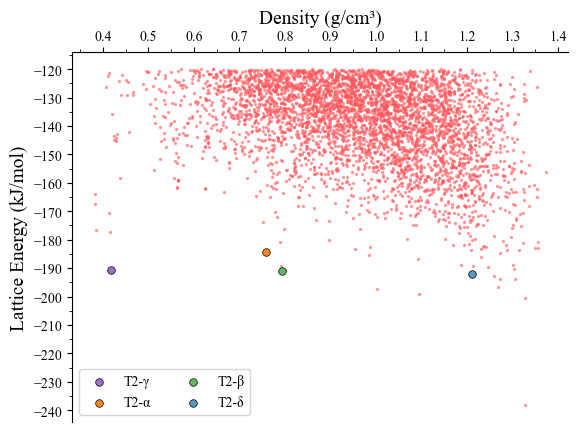

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from matplotlib.ticker import MultipleLocator

# 设置字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Read density and energy CSV files
df_density = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_density.csv', header=None)
df_energy = pd.read_csv(r'D:\Projects\MyProjects\MCRT\MCRT\cifs\Triptycene\T2cif\T2_lattice_energy.csv', header=None)

# Merge data
df = pd.merge(df_density, df_energy, on=0)
df.columns = ['Material', 'Density', 'Energy']

# Filter structures with energy values less than -120
df_filtered = df[df['Energy'] < -120]

# List of specific materials to highlight with different colors and names
highlight_materials = {
    'T2_00013': ('#9B71C1', 'T2-γ'), 
    'T2_00024': ('#F88724', 'T2-α'), 
    'T2_00011': ('#64B665', 'T2-β'),
    'T2_00009': ('#5898C1', 'T2-δ')  
}

# Create static scatter plot
fig, ax = plt.subplots()

# Plot scatter plot for the energy data
ax.scatter(df_filtered['Density'], df_filtered['Energy'], color='#FF595E', alpha=0.5, s=2)

# Highlight specific materials with different colors and names
for material, (color, name) in highlight_materials.items():
    highlight_data = df_filtered[df_filtered['Material'] == material]
    ax.scatter(highlight_data['Density'], highlight_data['Energy'], color=color, label=name, s=30, edgecolors='black', linewidth=0.5)

# Move X-axis to top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Remove right and bottom spines
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# Add legend and labels with larger font size
ax.set_xlabel('Density (g/cm³)', fontsize=14)
ax.set_ylabel('Lattice Energy (kJ/mol)', fontsize=14)
ax.legend(ncol=2)  # Adjust legend position and columns

# Save and display the plot
plot_path = os.path.splitext(csv_path)[0] + '_ESF_TURE.png'
plt.savefig(plot_path, dpi=300, format="png")
plt.show()


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_absolute_error, r2_score

# Read CSV file
csv_path = r"D:\Projects\MyProjects\MCRT\test_predictions_and_labels_mobility.csv"
df = pd.read_csv(csv_path)

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Calculate MAE and R²
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MAE and R²
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Define a function to create a colormap from a color to its lighter version
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

def create_cmap(hex_color):
    base_color = hex_to_rgb(hex_color)
    colors = [(base_color[0], base_color[1], base_color[2], alpha) for alpha in np.linspace(0.2, 1, 256)]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
    return cmap
# List of base colors (standard colors)
base_colors = [
    '#FF595E',     # Red
    '#FF924C',     # Green
    '#FFCA3A',     # Blue
    '#B8DE29',     # Yellow
    '#1982C4',
    '#6A4C93'      # Magenta
]
cmap= create_cmap(base_colors[3])

# Extract predictions and labels
y_pred = df['Predictions'].values
y_test = df['Labels'].values

# Plotting
plt.rcParams["font.family"] = "Times New Roman"
plot_path = os.path.splitext(csv_path)[0] + '.png'
x = np.array(y_pred)
y = np.array(y_test)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots()

# Main scatter plot
scatter = ax.scatter(y, x, c=z, s=10, cmap=cmap)
plt.colorbar(scatter, label='Point Density')
ax.set_xlabel('Actual Values',fontsize=16)
ax.set_ylabel('Predicted Values',fontsize=16)
min_val, max_val = min(min(y), min(x)), max(max(y), max(x))
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle="--", linewidth=1, color="black")


# Calculate the range for the inset plot
sorted_indices = np.argsort(y)[-15:]
inset_y = y[sorted_indices]
inset_x = x[sorted_indices]
inset_min = min(inset_y.min(), inset_x.min())-1
inset_max = max(inset_y.max(), inset_x.max())+1


# Inset plot
ax_inset = fig.add_axes([0.498, 0.17, 0.23, 0.28])  # [left, bottom, width, height]
mask = (y >= inset_min) & (y <= inset_max) & (x >= inset_min) & (x <= inset_max)
ax_inset.scatter(y[mask], x[mask], c=z[mask], s=10, cmap=cmap)
ax_inset.plot([inset_min, inset_max], [inset_min, inset_max], linestyle="--", linewidth=1, color="black")
ax_inset.set_xlim(inset_min, inset_max)
ax_inset.set_ylim(inset_min, inset_max)
# Set ticks to be integers
xticks = np.linspace(inset_min, inset_max, 5)
yticks = np.linspace(inset_min, inset_max, 5)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=9)
# # Rectangle to indicate zoomed area
# rect = plt.Rectangle((inset_min, inset_min), inset_max-inset_min, inset_max-inset_min, linewidth=1, linestyle="--", edgecolor='grey', facecolor='none')
# ax.add_patch(rect)

# Add two regions
# Region for true values
true_top_10 = np.sort(y)[-10:]
true_region_min = true_top_10.min()
ax_inset.axvspan(true_region_min, inset_max, color='yellow', alpha=0.15)

# Region for predicted values
pred_top_10 = np.sort(x)[-10:]
pred_region_min = pred_top_10.min()
ax_inset.axhspan(pred_region_min, inset_max, color='green', alpha=0.1)

# Set ticks to be integers and adjust font size
xticks = np.linspace(inset_min, inset_max, 6)
yticks = np.linspace(inset_min, inset_max, 6)
ax_inset.set_xticks(np.round(xticks).astype(int))
ax_inset.set_yticks(np.round(yticks).astype(int))
ax_inset.tick_params(axis='both', which='major', labelsize=8)  # Adjust the font size here


# Print the number of predicted values for the true top 10
num_predicted_in_true_top_10 = np.sum((y >= true_region_min) & (x >= pred_region_min))
print(f"Number of predicted values for the true top 10: {num_predicted_in_true_top_10}")

plt.savefig(plot_path,  dpi=300, bbox_inches='tight')
plt.show()

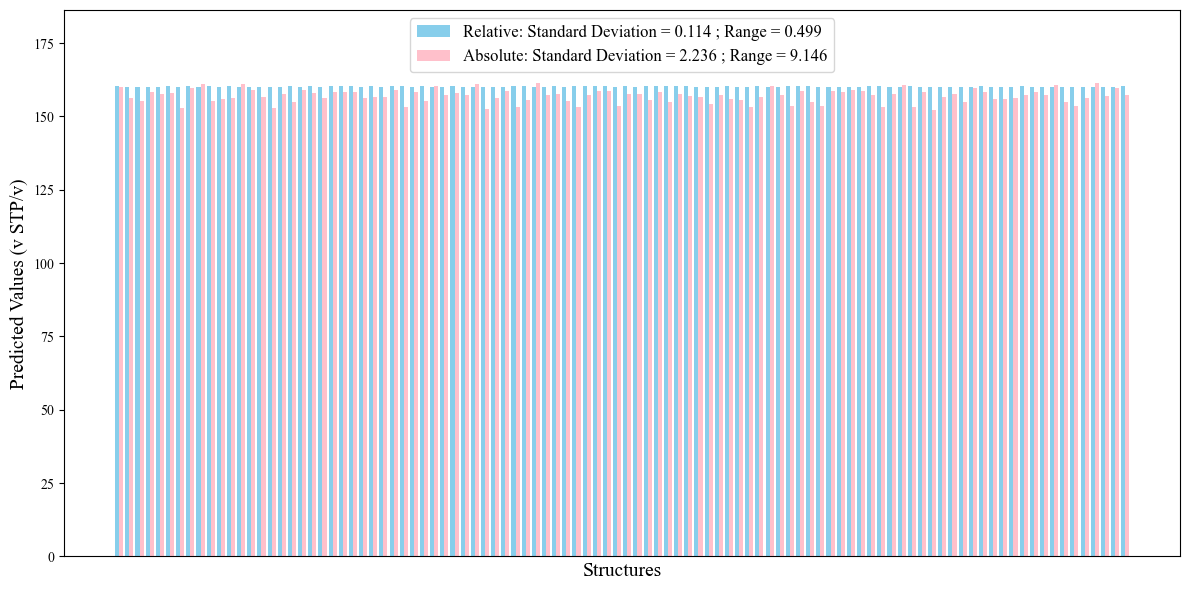

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取第一个CSV文件
data1 = pd.read_csv(r'D:\Projects\MyProjects\MCRT\test_predictions_and_labels_moved_cell_test.csv')

# 读取第二个CSV文件
data2 = pd.read_csv(r'D:\Projects\MyProjects\MCRT\test_predictions_and_labels_moved_cell_test_abs.csv')  

# 合并两个数据集，按CIF_ID匹配
merged_data = pd.merge(data1, data2, on='CIF_ID', suffixes=('_1', '_2'))

# 计算新CSV文件的均值和方差
mean_prediction_2 = merged_data['Predictions_2'].mean()
std_prediction_2 = merged_data['Predictions_2'].std()

# 计算两个数据集的极差
range_prediction_1 = merged_data['Predictions_1'].max() - merged_data['Predictions_1'].min()
range_prediction_2 = merged_data['Predictions_2'].max() - merged_data['Predictions_2'].min()

# 设置柱子的宽度和偏移
bar_width = 0.4
index = range(len(merged_data))

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(index, merged_data['Predictions_1'], bar_width, color='skyblue', label='Predictions CSV1')
plt.bar([i + bar_width for i in index], merged_data['Predictions_2'], bar_width, color='pink', label='Predictions CSV2')

# 设置图形标题和标签
# plt.title('Predictions Stability Comparison', fontsize=16)
plt.xlabel('Structures', fontsize=14)
plt.ylabel('Predicted Values (v STP/v)', fontsize=14)
plt.ylim([0, max(merged_data['Predictions_1'].max(), merged_data['Predictions_2'].max()) + 25])

# 移除 X 轴的标签
plt.xticks([])

# 添加图例并设置位置为右上角，自定义图例文字
plt.legend([
    f'Relative: Standard Deviation = {data1["Predictions"].std():.3f} ; Range = {range_prediction_1:.3f}',
    f'Absolute: Standard Deviation = {std_prediction_2:.3f} ; Range = {range_prediction_2:.3f}'
], loc='upper center', fontsize=12)

# 显示图形
plt.tight_layout()
plt.savefig(R"D:\Projects\MyProjects\MCRT\MCRT\data_processor\results_visual\moved_cell_test_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


T2 test summary

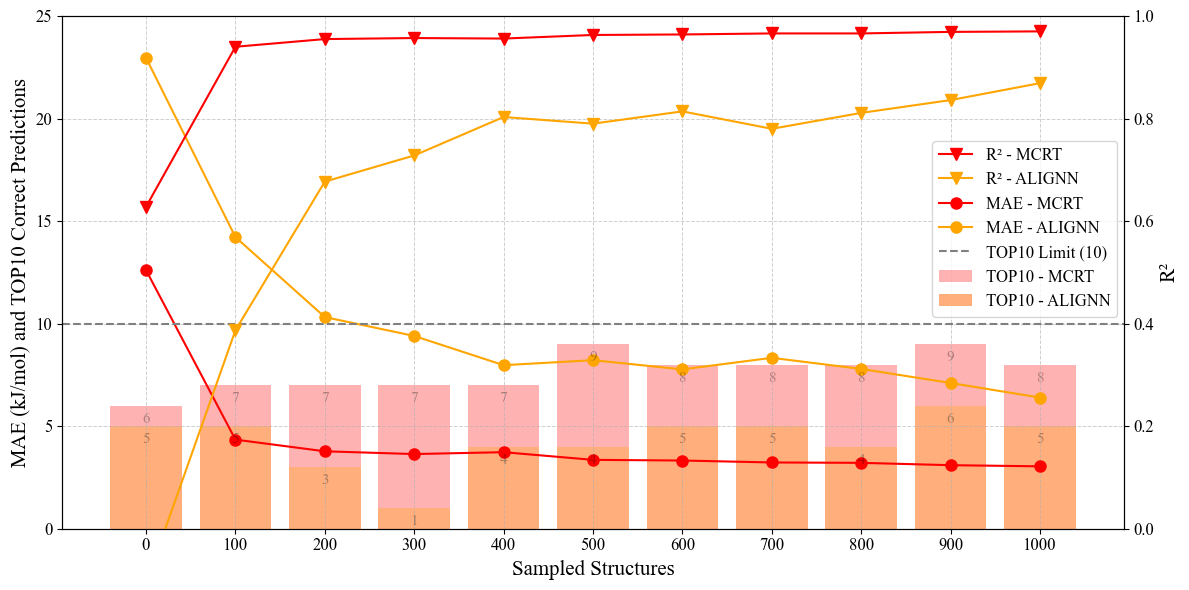

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "SAMPLED": [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 7500],
    "MCRT_MAE": [12.606, 4.344, 3.775, 3.641, 3.732, 3.358, 3.325, 3.231, 3.212, 3.098, 3.042, 2.958],
    "MCRT_R2": [0.628, 0.94, 0.955, 0.957, 0.956, 0.963, 0.964, 0.966, 0.966, 0.969, 0.97, 0.972],
    "MCRT_TOP10": [6, 7, 7, 7, 7, 9, 8, 8, 8, 9, 8, 8],
    "ALIGNN_MAE": [22.957, 14.218, 10.32, 9.399, 7.974, 8.218, 7.769, 8.333, 7.791, 7.105, 6.396, 3.453],
    "ALIGNN_R2": [-0.106, 0.387, 0.677, 0.728, 0.803, 0.79, 0.814, 0.78, 0.811, 0.836, 0.869, 0.963],
    "ALIGNN_TOP10": [5, 5, 3, 1, 4, 4, 5, 5, 4, 6, 5, 6]
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove the 7500 sample point for main visualization clarity
df_main = df[df["SAMPLED"] != 7500]

# Plotting
fig, ax_left = plt.subplots(figsize=(12, 6))

# Left Y-axis for MAE
ax_left.plot(df_main["SAMPLED"], df_main["MCRT_MAE"], label="MAE - MCRT", marker='o', linestyle='-', color="red", markersize=8)
ax_left.plot(df_main["SAMPLED"], df_main["ALIGNN_MAE"], label="MAE - ALIGNN", marker='o', linestyle='-', color="orange", markersize=8)
ax_left.set_ylabel("MAE (kJ/mol) and TOP10 Correct Predictions", fontsize=15)
ax_left.set_ylim(0, 25)

# Right Y-axis for R²
ax_right = ax_left.twinx()
ax_right.plot(df_main["SAMPLED"], df_main["MCRT_R2"], label="R² - MCRT", marker='v', linestyle='-', color="red", markersize=8)
ax_right.plot(df_main["SAMPLED"], df_main["ALIGNN_R2"], label="R² - ALIGNN", marker='v', linestyle='-', color="orange", markersize=8)
ax_right.set_ylabel("R²", fontsize=15)
ax_right.set_ylim(0, 1)

# Add TOP10 as background bars
bars_mcrt = ax_left.bar(df_main["SAMPLED"], df_main["MCRT_TOP10"], width=80, label="TOP10 - MCRT", color="red", alpha=0.3, zorder=1)
bars_alignn = ax_left.bar(df_main["SAMPLED"], df_main["ALIGNN_TOP10"], width=80, label="TOP10 - ALIGNN", color="#FFAE7C", alpha=1, zorder=1)

# Add text labels on top of each TOP10 bar for MCRT and ALIGNN
for bar, value in zip(bars_alignn, df_main["ALIGNN_TOP10"]):
    ax_left.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.3, str(value), 
                 ha='center', va='top', fontsize=11, color="black", alpha=0.3)
    
for bar, value in zip(bars_mcrt, df_main["MCRT_TOP10"]):
    ax_left.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.3, str(value), 
                 ha='center', va='top', fontsize=11, color="black", alpha=0.3)

# Customizing x-axis to show all sample points labels
ax_left.set_xticks(df_main["SAMPLED"])
ax_left.set_xticklabels(df_main["SAMPLED"], rotation=0, fontsize=12)
ax_left.tick_params(axis='y', labelsize=12)   # Left Y-axis
ax_right.tick_params(axis='y', labelsize=12)  # Right Y-axis
# Shared gridlines only on left axis
ax_left.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
ax_right.grid(False)

# Add horizontal line at 10 to represent the TOP10 upper limit
ax_left.axhline(y=10, color='gray', linestyle='--', linewidth=1.5, label="TOP10 Limit (10)")

# Collect handles and labels from both axes for a single legend
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()
combined_handles = handles_right + handles_left
combined_labels = labels_right + labels_left

# Add a single, combined legend on the right side, centered vertically
fig.legend(combined_handles, combined_labels, loc="center right", bbox_to_anchor=(0.942, 0.61), fontsize=12)

# Labels and title
ax_left.set_xlabel("Sampled Structures", fontsize=15)

plt.tight_layout()
plt.savefig(R"D:\Projects\MyProjects\MCRT\MCRT\data_processor\results_visual\T2_test_summary.png", dpi=300, bbox_inches='tight')
plt.show()
